<a href="https://colab.research.google.com/github/Vinithpr2004/PRODIGY_DS_2/blob/main/Prodigy_DS_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [22]:
data=pd.read_csv(r'/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    int64 
 4   Age          891 non-null    int64 
 5   SibSp        891 non-null    int64 
 6   Parch        891 non-null    int64 
 7   Ticket       891 non-null    object
 8   Fare         891 non-null    int64 
 9   Cabin        891 non-null    object
 10  Embarked     891 non-null    object
dtypes: int64(8), object(3)
memory usage: 76.7+ KB


In [35]:
data.dtypes


PassengerId     int64
Survived        int64
Pclass          int64
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Cabin          object
Embarked       object
dtype: object

In [36]:
#Survived
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [37]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
data.value_counts()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Ticket      Fare  Cabin  Embarked
1            0         3       1    22   1      0      A/5 21171   7     B96    S           1
599          0         3       1    28   0      0      2664        7     B96    C           1
588          1         1       1    60   1      1      13567       79    B41    C           1
589          0         3       1    22   0      0      14973       8     B96    S           1
590          0         3       1    28   0      0      A./5. 3235  8     B96    S           1
                                                                                           ..
301          1         3       0    28   0      0      9234        7     B96    Q           1
302          1         3       1    28   2      0      367226      23    B96    Q           1
303          0         3       1    19   0      0      LINE        0     B96    S           1
304          1         2       0    28   0      0      226593    

In [40]:
#outlier checking
num_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


EDA

Univariate analysis

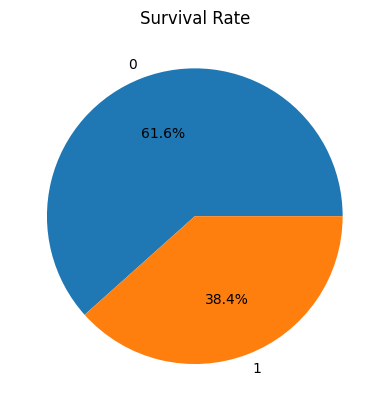

In [42]:
#Survival rate

def plot_survival_rate(df):
    #Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%')

    # Add a title
    ax.set_title('Survival Rate')

    # Show the plot
    plt.show()
plot_survival_rate(data)

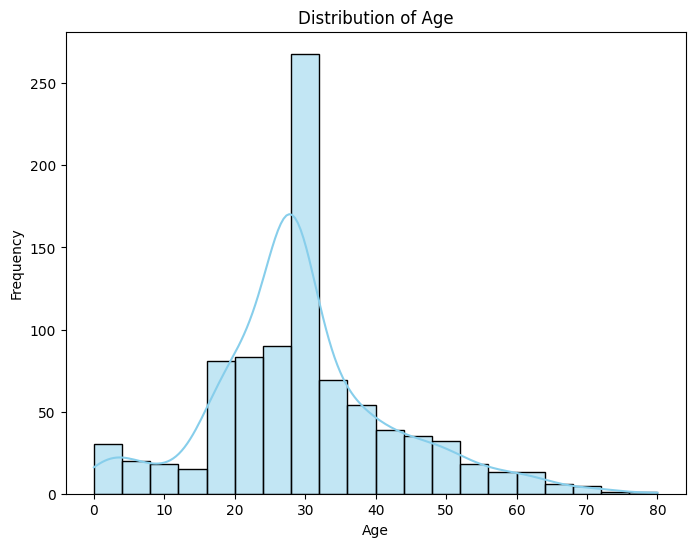

In [44]:
#Age Distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

<ipython-input-47-d1c1d8972a7a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Pclass', palette='Blues')


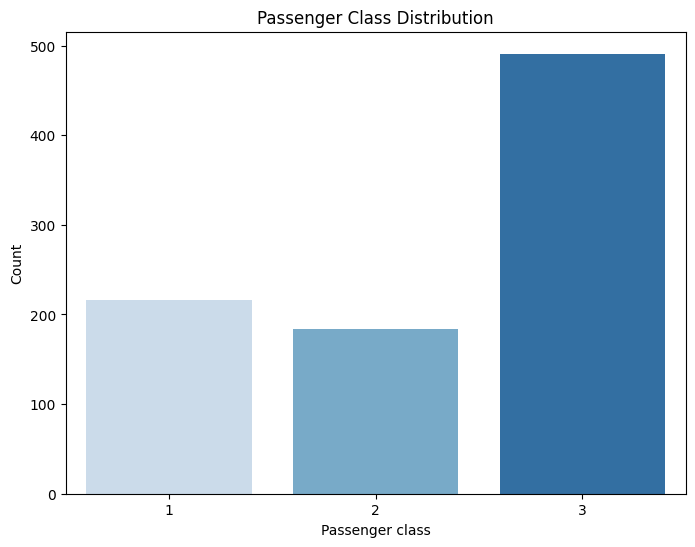

In [47]:
#Passenger class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', palette='Blues')
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()



class 3 has the highest count.

Bivariate analysis.

In [48]:
#age vs fare with survival hue

fig = px.scatter(data, x='Age', y='Fare', color='Survived', title='Scatter Plot of Age vs. Fare')
fig.show()

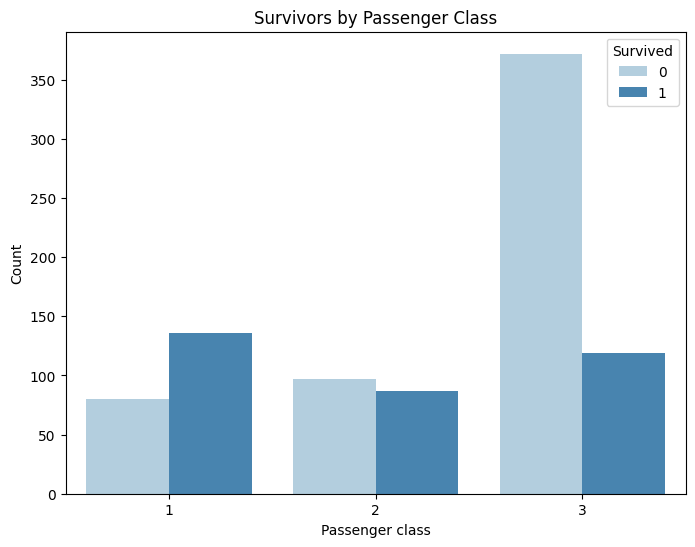

In [51]:
#survivors by passenger class

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived', palette='Blues')
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.title('Survivors by Passenger Class')
plt.show()

<ipython-input-53-9fb6a327e5b6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




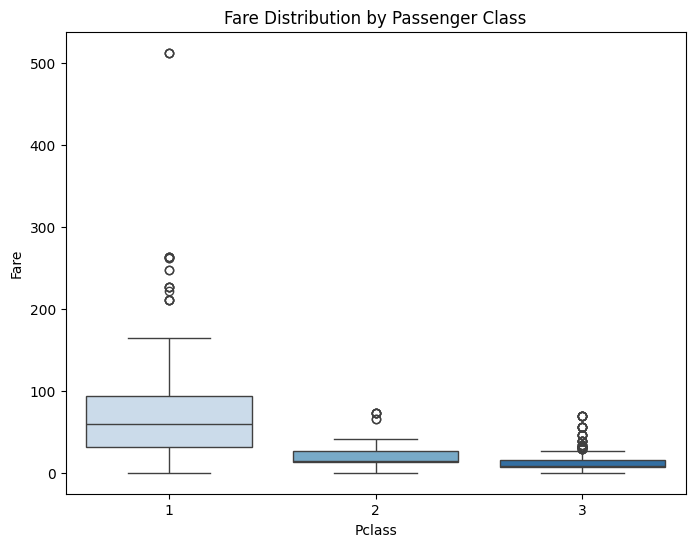

In [53]:
#Fare Distribution by Passenger Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Pclass', y='Fare', palette='Blues')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()



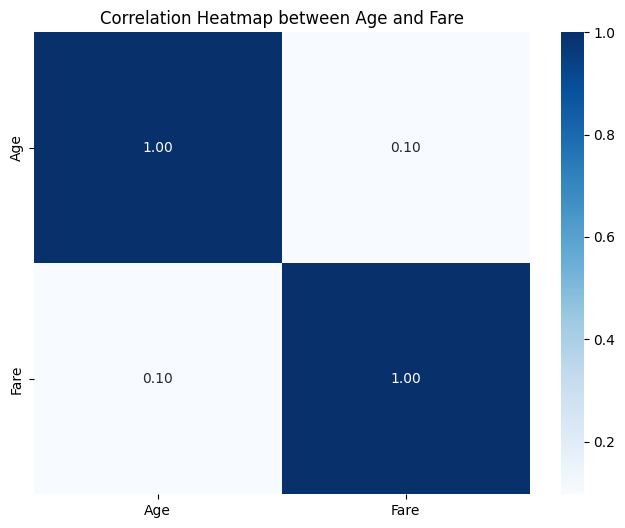

In [54]:
#Correlation heatmap between Age and Fare

correlation_matrix = data[['Age', 'Fare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap between Age and Fare')
plt.show()



The correlation coefficient of 0.1 suggests a very weak positive linear relationship between a passenger's age and the fare they paid.

There is a slight tendency for older passengers to pay slightly higher fares, but the correlation is not strong enough to draw significant conclusions.